<a href="https://colab.research.google.com/github/antonsysoev/DeepLearning/blob/main/CNN_Cats_vs_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Набор данных «Dogs vs. Cats»

Cоздан в ходе состязаний по распознаванию образов в конце 2013-го, когда сверточные нейронные сети еще не заняли лидирующего положения, и доступен на сайте Kaggle. 

Этот набор можно получить по адресу: www.kaggle.com/c/dogs-vs-cats/data

Этот набор содержит 25 000 изображений кошек и собак (по 12 500 для каждого класса) общим объемом 543 Мбайт (в сжатом виде). После загрузки и распаковки архива  создадим новый набор, разделенный на три поднабора: обучающий набор с 1000 образцами каждого класса, проверочный набор с 500 образцами каждого класса и контрольный набор с 500 образцами каждого класса.

In [1]:
import os, shutil

In [2]:
original_dataset_dir = '/content/drive/MyDrive/kaggle_original_data/train'

base_dir = '/content/drive/MyDrive/kaggle_cats_dogs'

In [ ]:
# os.mkdir(base_dir)

In [3]:
train_dir = os.path.join(base_dir, 'train') 
# os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)

In [4]:
train_cats_dir = os.path.join(train_dir, 'cats')
# os.mkdir(train_cats_dir)

In [5]:
train_dogs_dir = os.path.join(train_dir, 'dogs')
# os.mkdir(train_dogs_dir)

In [6]:
validation_cats_dir = os.path.join(validation_dir, 'cats')
# os.mkdir(validation_cats_dir)

In [7]:
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
# os.mkdir(validation_dogs_dir)

In [8]:
test_cats_dir = os.path.join(test_dir, 'cats')
# os.mkdir(test_cats_dir)

In [9]:
test_dogs_dir = os.path.join(test_dir, 'dogs')
# os.mkdir(test_dogs_dir)

In [ ]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

KeyboardInterrupt: ignored

In [ ]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

Cверточная нейронная сеть будет организована как стек чередующихся слоев Conv2D (с функцией активации relu) и MaxPooling2D.

она будет иметь на одну пару слоев Conv2D + MaxPooling2D больше. Это увеличит ее емкость и обеспечит дополнительное снижение размеров карт признаков, чтобы они не оказались слишком большими, когда достигнут слоя Flatten. 

In [17]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
          input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [12]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

В настоящее время данные хранятся в виде файлов JPEG, поэтому их нужно подготовить для передачи в сеть, выполнив следующие шаги:
1. Прочитать файлы с изображениями.
2. Декодировать содержимое из формата JPEG в таблицы пикселов RGB.
3. Преобразовать их в тензоры с вещественными числами.
4. Масштабировать значения пикселов из диапазона [0, 255] в диапазон [0, 1] (нейронным сетям предпочтительнее передавать небольшие значения).

In [18]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,  
    target_size=(150, 150), 
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150), 
        batch_size=20,
        class_mode='binary')

Found 1500 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=40,
      epochs=25,
      validation_data=validation_generator,
      validation_steps=50)

<ipython-input-14-943946ff2e0f>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
10/10 [==============================] - 285s 31s/step - loss: 0.6091 - acc: 0.7100 - val_loss: 0.7429 - val_acc: 0.5000
Epoch 2/10
10/10 [==============================] - 38s 4s/step - loss: 0.6252 - acc: 0.6800 - val_loss: 0.7643 - val_acc: 0.5000
Epoch 3/10
10/10 [==============================] - 37s 4s/step - loss: 0.6231 - acc: 0.6700 - val_loss: 0.7642 - val_acc: 0.5000
Epoch 4/10
10/10 [==============================] - 34s 4s/step - loss: 0.6065 - acc: 0.7000 - val_loss: 0.7487 - val_acc: 0.5000
Epoch 5/10
10/10 [==============================] - 34s 4s/step - loss: 0.6150 - acc: 0.6600 - val_loss: 0.6916 - val_acc: 0.5000
Epoch 6/10
10/10 [==============================] - 35s 4s/step - loss: 0.6339 - acc: 0.6600 - val_loss: 0.7067 - val_acc: 0.5000
Epoch 7/10
10/10 [==============================] - 35s 4s/step - loss: 0.6148 - acc: 0.6400 - val_loss: 0.7075 - val_acc: 0.5000
Epoch 8/10
10/10 [==============================] - 35s 4s/step - loss: 0.5863 - acc: 0.

In [15]:
model.save('/content/kaggle_original_data/cats_and_dogs_small_1.h5')

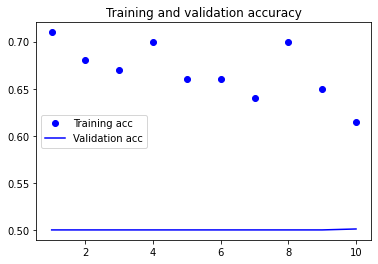

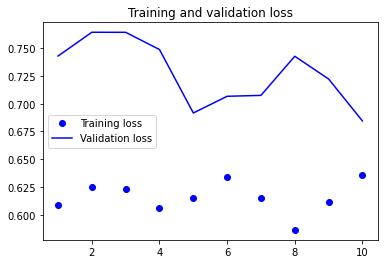

In [19]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()

Причиной переобучения является недостаточное количество образцов для обучения модели, способной обобщать новые данные. Имея бесконечный объем данных, можно было бы получить модель, учитывающую все аспекты распределения данных: эффект переобучения никогда не наступил бы. Прием расширения данных реализует подход создания дополнительных обучающих данных из имеющихся путем трансформации образцов множеством случайных преобразований, дающих правдоподобные изображения. Цель состоит в том, чтобы на этапе обучения модель никогда не увидела одно и то же изображение дважды. Это поможет модели выявить больше особенностей данных и достичь лучшей степени обобщения.

Сделать это в Keras можно путем настройки ряда случайных преобразований для изображений, читаемых экземпляром ImageDataGenerator. Начнем с простого примера.

In [24]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

* rotation_range — величина в градусах (0–180), диапазон, в 
котором будет осуществляться случайный поворот изображения;

* width_shift и height_shift — диапазоны (в долях ширины и высоты), в пределах которых изображения смещаются по горизонтали и вертикали соответственно;
* shear_range — для случайного применения сдвигового (shearing) преобразования;
* zoom_range — для случайного изменения масштаба внутри изображений;
* horizontal_flip — для случайного переворачивания половины изображения по горизонтали — подходит в случае отсутствия предположений о горизонтальной асимметрии (например, в изображениях реального мира);
* fill_mode — стратегия заполнения вновь созданных пикселов, появляющихся после поворота или смещения по горизонтали/вертикали.

In [30]:
import keras.utils as image

fnames = [os.path.join(train_cats_dir, fname) for
    fname in os.listdir(train_cats_dir)]

img_path = fnames[5]

In [31]:
img_path

'/content/drive/MyDrive/kaggle_cats_dogs/train/cats/cat.6.jpg'

In [36]:
from keras.utils import load_img

In [37]:
img = load_img(img_path, target_size=(150, 150))   

In [38]:
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

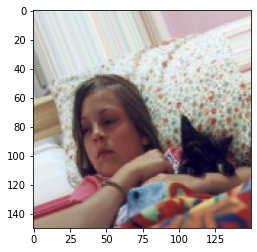

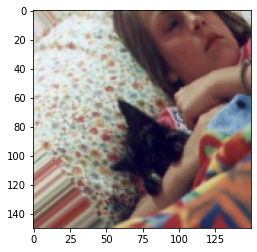

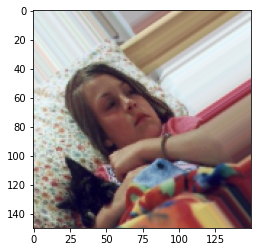

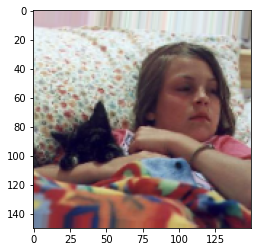

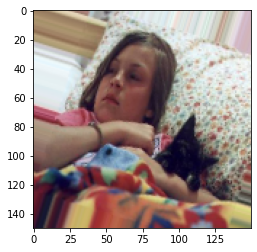

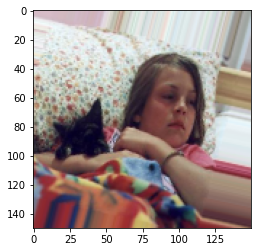

In [40]:
i= 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 6 == 0:
        break
plt.show()

In [41]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
          input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [42]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150), 
    batch_size=32, 
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

history = model.fit(
    train_generator,
    steps_per_epoch=40,
    epochs=25,
    validation_data=validation_generator,
    validation_steps=50)

Found 1500 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/25
32/40 [=======================>......] - ETA: 16s - loss: 0.6412 - acc: 0.6480